## Import Some Fricken Useful Libraries

In [1]:
# Basic Math & Data Manipulation
import pandas as pd
from ellipse import LsqEllipse
import numpy as np
import statistics
from statistics import mean

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse 

## Sweet Ass Function(s)

In [2]:
def merge_list(a, b):
    return list(map(lambda x, y:[x,y], a, b))

## Start Loading Data

In [3]:
perfect_filename = "perfect_data.xlsx"

perfect_df = pd.read_excel(perfect_filename)

perfect_x = perfect_df.X.tolist()
perfect_y = perfect_df.Y.tolist()

perfect_data = np.array(merge_list(perfect_x, perfect_y))

In [4]:
error_filename = "error_data_2.xlsx"

error_df = pd.read_excel(error_filename)

error_x = error_df.X.tolist()
error_y = error_df.Y.tolist()

error_data = np.array(merge_list(error_x, error_y))

Ellipse is a perfect circle, the answer is degenerate


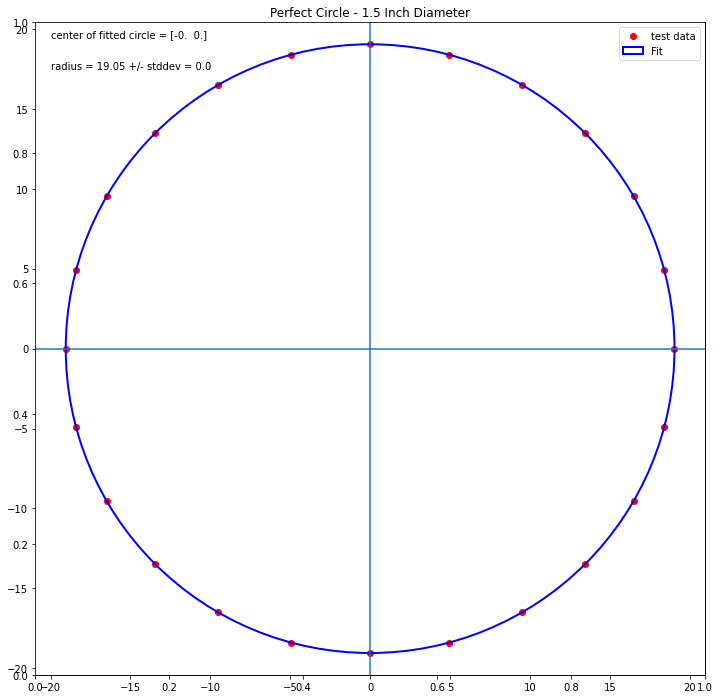

In [5]:
from ellipse import LsqEllipse
import numpy as np
import matplotlib.pyplot as plt
import statistics
from statistics import mean 

from matplotlib.patches import Ellipse

perfect_title = "Perfect Circle - 1.5 Inch Diameter"

lsqe = LsqEllipse()
lsqe.fit(np.array(perfect_data))
center, width, height, phi = lsqe.as_parameters()

plt.close('all')
fig = plt.figure(figsize=(12,12))
plt.title(perfect_title)
ax = fig.add_subplot(111)
ax.axis('equal')
ax.plot(perfect_data[:,0], perfect_data[:,1], 'ro', label='test data', zorder=1)

ellipse = Ellipse(xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
              edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)
ax.text(-20, 19.5, f'center of fitted circle = {np.round(center)}')
ax.text(-20, 17.5, f'radius = {np.round(mean([width,height]), 3)} +/- stddev = {np.round(statistics.stdev([width,height]))}')
plt.axvline(x=0)
plt.axhline(y=0)
plt.legend()
plt.savefig(perfect_title + ".jpg")
plt.show()

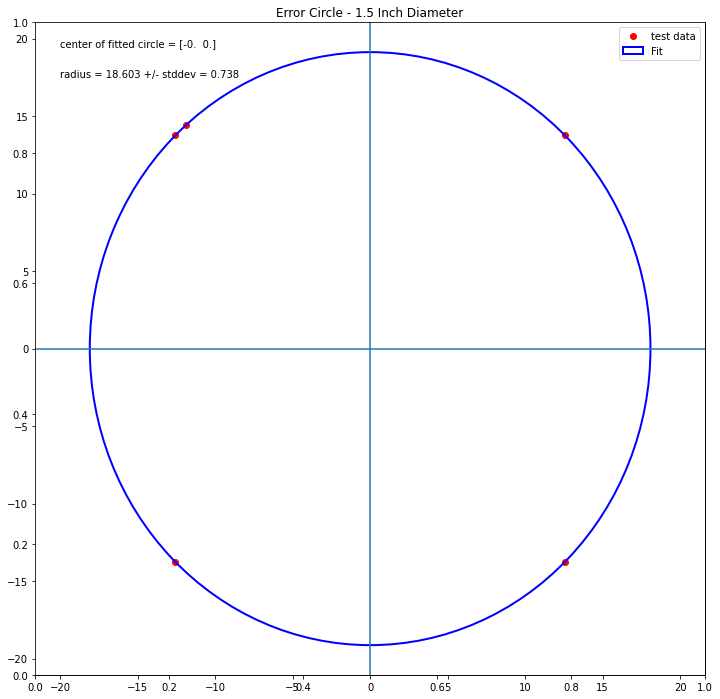

In [6]:
error_title = "Error Circle - 1.5 Inch Diameter"

lsqe = LsqEllipse()
lsqe.fit(np.array(error_data))
center, width, height, phi = lsqe.as_parameters()     

plt.close('all')
fig = plt.figure(figsize=(12,12))
plt.title(error_title)
ax = fig.add_subplot(111)
ax.axis('equal')
ax.plot(error_data[:,0], error_data[:,1], 'ro', label='test data', zorder=1)

ellipse = Ellipse(xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
              edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)
ax.text(-20, 19.5, f'center of fitted circle = {np.round(center, 3)}')
ax.text(-20, 17.5, f'radius = {np.round(mean([width,height]), 3)} +/- stddev = {np.round(statistics.stdev([width,height]), 3)}')
plt.axvline(x=0)
plt.axhline(y=0)
plt.legend()
plt.savefig(error_title + ".jpg")
plt.show()

In [7]:
error_only_data = np.delete(error_data, [0, 5, 10, 15], axis=0)

IndexError: index 5 is out of bounds for axis 0 with size 5

In [ ]:
error_title = "Error Only Circle - 1.5 Inch Diameter"

lsqe = LsqEllipse()
lsqe.fit(np.array(error_only_data))
center, width, height, phi = lsqe.as_parameters()

plt.close('all')
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.plot(error_only_data[:,0], error_only_data[:,1], 'ro', label='test data', zorder=1)

ellipse = Ellipse(xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
              edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)
ax.text(-20, 19.5, f'center of fitted circle = {np.round(center,3)}')
ax.text(-20, 17.5, f'radius = {np.round(mean([width,height]), 3)} +/- stddev = {statistics.stdev([width,height])}')
plt.axvline(x=0)
plt.axhline(y=0)
plt.legend()
plt.savefig(error_title + ".jpg")
plt.show()